In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!source /content/drive/MyDrive/colab_env/bin/activate;

In [3]:
import sys
sys.path.append('/content/drive/MyDrive/colab_env/lib/python3.10/site-packages')

In [4]:
import numpy as np
import nltk

In [5]:
from nltk import pos_tag, regexp_tokenize, corpus, stem

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
import pickle
import joblib

In [10]:
from imblearn.over_sampling import SMOTE

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
#Set the reviews text file path
file_path = "/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/reviews_Apps_for_Android_5.training.txt"

In [18]:
#Import the reviews raw data into a pandas dataframe called df
#Create column names using 'names' argument
df = pd.read_csv(file_path, sep='\t', header=None, names=['rating', 'app', 'review'])

In [19]:
#Display top 5 instances
df.head(5)

,rating,app,review
0,2,B004A9SDD8,"Loves the song, so he really couldn't wait to ..."
1,3,B004A9SDD8,"Oh, how my little grandson loves this app. He'..."
2,3,B004A9SDD8,I found this at a perfect time since my daught...
3,3,B004A9SDD8,My 1 year old goes back to this game over and ...
4,3,B004A9SDD8,There are three different versions of the song...


In [20]:
#Reduce all reviews to lower case
df['review'] = df['review'].apply(lambda x: x.lower())

In [21]:
#Create new column with tokenised reviews using regexp_tokenize
df['tokenized'] = df['review'].apply(lambda x: regexp_tokenize(x, pattern=r"[\w']+"))

In [22]:
df.head(5)

,rating,app,review,tokenized
0,2,B004A9SDD8,"loves the song, so he really couldn't wait to ...","[loves, the, song, so, he, really, couldn't, w..."
1,3,B004A9SDD8,"oh, how my little grandson loves this app. he'...","[oh, how, my, little, grandson, loves, this, a..."
2,3,B004A9SDD8,i found this at a perfect time since my daught...,"[i, found, this, at, a, perfect, time, since, ..."
3,3,B004A9SDD8,my 1 year old goes back to this game over and ...,"[my, 1, year, old, goes, back, to, this, game,..."
4,3,B004A9SDD8,there are three different versions of the song...,"[there, are, three, different, versions, of, t..."


In [23]:
#Set the english stopwords collection
stop_wrds = set(stopwords.words("english"))

#Create new column with filtered reviews removing common english stopwords
df["filtered"] = df['tokenized'].apply(lambda x: [word for word in x if word.lower() not in stop_wrds])

In [24]:
df.head(5)

,rating,app,review,tokenized,filtered
0,2,B004A9SDD8,"loves the song, so he really couldn't wait to ...","[loves, the, song, so, he, really, couldn't, w...","[loves, song, really, wait, play, little, less..."
1,3,B004A9SDD8,"oh, how my little grandson loves this app. he'...","[oh, how, my, little, grandson, loves, this, a...","[oh, little, grandson, loves, app, he's, alway..."
2,3,B004A9SDD8,i found this at a perfect time since my daught...,"[i, found, this, at, a, perfect, time, since, ...","[found, perfect, time, since, daughter's, favo..."
3,3,B004A9SDD8,my 1 year old goes back to this game over and ...,"[my, 1, year, old, goes, back, to, this, game,...","[1, year, old, goes, back, game, simple, easy,..."
4,3,B004A9SDD8,there are three different versions of the song...,"[there, are, three, different, versions, of, t...","[three, different, versions, song, game, keeps..."


In [25]:
#Instantiate Lemmatiser function
lemmatizer = WordNetLemmatizer()

#Create new column with lemmatised filtered reviews. Lemmatisation done on each word
df['lemmatized'] = df['filtered'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [26]:
df.head(5)

,rating,app,review,tokenized,filtered,lemmatized
0,2,B004A9SDD8,"loves the song, so he really couldn't wait to ...","[loves, the, song, so, he, really, couldn't, w...","[loves, song, really, wait, play, little, less...","[love, song, really, wait, play, little, le, i..."
1,3,B004A9SDD8,"oh, how my little grandson loves this app. he'...","[oh, how, my, little, grandson, loves, this, a...","[oh, little, grandson, loves, app, he's, alway...","[oh, little, grandson, love, app, he's, always..."
2,3,B004A9SDD8,i found this at a perfect time since my daught...,"[i, found, this, at, a, perfect, time, since, ...","[found, perfect, time, since, daughter's, favo...","[found, perfect, time, since, daughter's, favo..."
3,3,B004A9SDD8,my 1 year old goes back to this game over and ...,"[my, 1, year, old, goes, back, to, this, game,...","[1, year, old, goes, back, game, simple, easy,...","[1, year, old, go, back, game, simple, easy, t..."
4,3,B004A9SDD8,there are three different versions of the song...,"[there, are, three, different, versions, of, t...","[three, different, versions, song, game, keeps...","[three, different, version, song, game, keep, ..."


#### EDA

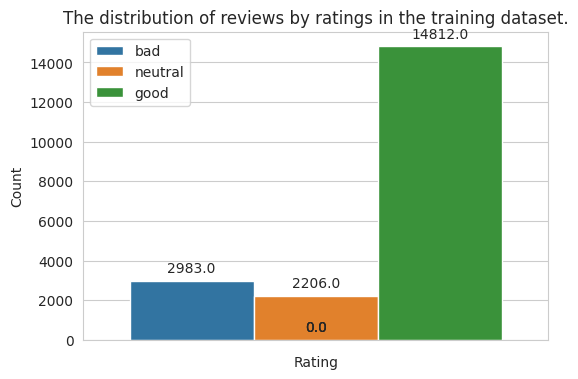

In [28]:
#Create a figure
plt.figure(1, figsize=(6,4))
#Set background
sns.set_style('whitegrid')
#create barplot of showing the distribution of reviews in the entire test dataset
ax = sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(df[df['rating']==1]), len(df[df['rating']==2]), len(df[df['rating']==3])])

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points')


#Create title for the figure
plt.title('The distribution of reviews by ratings in the training dataset.')
#Create xlabel
plt.xlabel('Rating')
#Create ylabel
plt.ylabel('Count')
#
plt.savefig('/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/train_dist.svg')
#Show the plot
plt.show()

##### Machine Learning

- Logistic Regressor

- with the original training dataset

In [24]:
# Split data into train and test sets
#X data is the lemmatised text data
#y data is the review rating
X_train, X_test, y_train, y_test = train_test_split(df["lemmatized"], df["rating"], test_size=0.2, random_state=101)

In [ ]:
#Instantiate pipeline function with CountVectorizer, TfidfTransformer and LogisticRegressor
pipeline = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer()), ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
#Vectorise X_train and train the LogReg model
pipeline.fit(X_train.apply(" ".join), y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
#Vectorise X_test and predict using the LogReg model
y_preds = pipeline.predict(X_test.apply(" ".join))

In [ ]:
#Print the confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 251   18  350]
 [  57   29  348]
 [  24   15 2909]]


In [ ]:
#Print the classification scores
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.76      0.41      0.53       619
           2       0.47      0.07      0.12       434
           3       0.81      0.99      0.89      2948

    accuracy                           0.80      4001
   macro avg       0.68      0.49      0.51      4001
weighted avg       0.76      0.80      0.75      4001



- The accuracy is fairly good at 80 %
- however the recall for class 1 and 2 are terrible at 48 and 10 % respectively

- with the balanced training dataset

In [22]:
#Instantiate pipeline function with CountVectorizer, TfidfTransformer
pipeline = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer())])

In [25]:
#Fit vectorisation pipeline to X_train data
pipeline.fit(X_train.apply(" ".join), y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer())])

In [26]:
#filename = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/pipeline_data_tranformer_model.sav'
#pickle.dump(pipeline, open(filename, 'wb'))

In [ ]:
#Transform X_train data using vectorisation pipeline
X_train_transformed = pipeline.transform(X_train.apply(" ".join))

In [ ]:
#Instantiate SMOTE function
smote = SMOTE(sampling_strategy='auto', random_state=101)

In [ ]:
#Create samples of training data that have balanced classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [ ]:
#Display new class counts, count new y_train data with balanced classes
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(f"Class distribution after SMOTE: {dict(zip(unique, counts))}")

Class distribution after SMOTE: {1: 11864, 2: 11864, 3: 11864}


In [ ]:
#Instantiate LogRegressor model with maximum iteration argument = 1000
logistic_regressor = LogisticRegression(max_iter=1000)

In [ ]:
#Train the LogReg with the balanced vectorised X_train dataset
logistic_regressor.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [ ]:
#Transform the X_test data using the pipeline for vectorisation
X_test_transformed = pipeline.transform(X_test.apply(" ".join))

In [ ]:
#Make label predictions on the X_test data
y_pred = logistic_regressor.predict(X_test_transformed)  #

In [ ]:
#Evaluation of results using confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 386   92  141]
 [ 101  131  202]
 [ 135  186 2627]]


In [ ]:
#Print the prediction results report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.62      0.62       619
           2       0.32      0.30      0.31       434
           3       0.88      0.89      0.89      2948

    accuracy                           0.79      4001
   macro avg       0.61      0.61      0.61      4001
weighted avg       0.78      0.79      0.78      4001



- for this model, the overall accuracy is lower than the first version, but the recall for class 1 and 2 have improved but at the expense of the recall for class 3

- GridSearch for best Logistic Regressor

In [ ]:
# Create a LogisticRegression Classifier
lr = LogisticRegression(max_iter=1000)

# Define hyperparameters and their possible values
param_grid = {'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
#Instantiate gridsearch with the classifier, hyperparameters and scoring metric
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
#Train the various models using the various parameters
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [ ]:
#Save best performing hyperparameters
best_params = grid_search.best_params_
#Save the best cross-validation score
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

Best Parameters: {'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validated Accuracy: 0.9365


In [ ]:
#Transform the X_test data using the pipeline for vectorisation
X_test_transformed = pipeline.transform(X_test.apply(" ".join))

In [ ]:
#Save the best performing model from gridsearch
best_lr_model = grid_search.best_estimator_
#Make predictions and evaluate the best performing model from gridsearch
test_accuracy = best_lr_model.score(X_test_transformed, y_test)
print(f"Test Accuracy with Best Model: {test_accuracy:.4f}")

Test Accuracy with Best Model: 0.7858


In [ ]:
#filename = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/best_lr_model.sav'
#pickle.dump(best_lr_model, open(filename, 'wb'))

- Random Forest

- with original training dataset:

In [ ]:
#Instantiate pipeline function with CountVectorizer, TfidfTransformer and RandomForest
pipeline_rf = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer()), ('classifier', RandomForestClassifier(100))])

In [ ]:
#Vectorise X_train and train the RF model
pipeline_rf.fit(X_train.apply(" ".join), y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
#Vectorise X_test and predict using the RF model
y_preds = pipeline_rf.predict(X_test.apply(" ".join))

In [ ]:
#Print the confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 143    3  473]
 [  24    8  402]
 [  11    2 2935]]


In [ ]:
#Print the classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.80      0.23      0.36       619
           2       0.62      0.02      0.04       434
           3       0.77      1.00      0.87      2948

    accuracy                           0.77      4001
   macro avg       0.73      0.42      0.42      4001
weighted avg       0.76      0.77      0.70      4001



- with balanced training dataset:

In [ ]:
#Instantiate the RF model with 100 trees
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
#train the model using the balanced training data
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [ ]:
#transform the X_test data by vectorising using the pipeline function
X_test_transformed = pipeline.transform(X_test.apply(" ".join))

In [ ]:
#Make predictions for the X_test data
y_pred = rf.predict(X_test_transformed)  #

In [ ]:
#Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 167    9  443]
 [  30   22  382]
 [  31   11 2906]]


In [ ]:
#Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.27      0.39       619
           2       0.52      0.05      0.09       434
           3       0.78      0.99      0.87      2948

    accuracy                           0.77      4001
   macro avg       0.68      0.44      0.45      4001
weighted avg       0.74      0.77      0.71      4001



- GridSearch for best Random Forest

In [ ]:
# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Define hyperparameters and their possible values
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}


In [ ]:
#Instantiate the gridsearch function with the RF model, parameters and scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
#Train the the gridsearch models
grid_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
#Save the best hyperparameters
best_params = grid_search.best_params_
#Save the best accuracy score
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

In [ ]:
#Vectorise X_test data
X_test_transformed = pipeline.transform(X_test.apply(" ".join))

In [ ]:
#save the best performing model
best_rf_model = grid_search.best_estimator_
#Evaluate the best model
test_accuracy = best_rf_model.score(X_test_transformed, y_test)
print(f"Test Accuracy with Best Model: {test_accuracy:.4f}")


In [ ]:
#filename = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/best_rf_model.sav'
#pickle.dump(best_rf_model, open(filename, 'wb'))

- Naive Bayes: MultinomialNB and BernoulliNB

- with original training dataset:

In [ ]:
#Instantiate pipeline function with CountVectorizer, TfidfTransformer and Multinomial Naive Byes
pipeline_nb_M = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer()), ('classifier', MultinomialNB())])

In [ ]:
#Train the pipeline
pipeline_nb_M.fit(X_train.apply(" ".join), y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
#Make predictions using the pipeline
y_preds = pipeline_nb_M.predict(X_test.apply(" ".join))

In [ ]:
#Print confusion matrix
print(confusion_matrix(y_test, y_preds))

[[   0    0  619]
 [   0    0  434]
 [   0    0 2948]]


In [ ]:
#Print classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       619
           2       0.00      0.00      0.00       434
           3       0.74      1.00      0.85      2948

    accuracy                           0.74      4001
   macro avg       0.25      0.33      0.28      4001
weighted avg       0.54      0.74      0.63      4001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- with balanced training dataset:

In [ ]:
#Instantiate the model
nb_M = MultinomialNB()

In [ ]:
#Train the model using balanced dataset
nb_M.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
#Vectotise test data using the pipeline
X_test_transformed = pipeline.transform(X_test.apply(" ".join))

In [ ]:
#Make predictions using model
y_pred = nb_M.predict(X_test_transformed)  #

In [ ]:
#Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 383  115  121]
 [ 100  174  160]
 [ 179  346 2423]]


In [ ]:
#Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.62      0.60       619
           2       0.27      0.40      0.33       434
           3       0.90      0.82      0.86      2948

    accuracy                           0.74      4001
   macro avg       0.58      0.61      0.59      4001
weighted avg       0.78      0.74      0.76      4001



- GridSearch for best Naive Bayes

In [ ]:
# Create a Multinomial Classifier
nb_M = MultinomialNB()

# Define hyperparameters and their possible values
param_grid = {'alpha': [0.1, 1, 10], 'fit_prior': [True, False]}

In [ ]:
#Instantiate GridSearch with Naive Bayes model, hyperparameters and scoring metric
grid_search = GridSearchCV(estimator=nb_M, param_grid=param_grid, cv=5, scoring='accuracy')
#Train the gridsearch models with balanced data
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10], 'fit_prior': [True, False]},
             scoring='accuracy')

In [ ]:
#Save the best hyperparameters
best_params = grid_search.best_params_
#Save the accuracy best score
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Best Cross-Validated Accuracy: 0.9467


In [ ]:
#Vectorise x_test data
X_test_transformed = pipeline.transform(X_test.apply(" ".join))

In [ ]:
#Save best model
best_nb_model = grid_search.best_estimator_
#Evaluate the best model
test_accuracy = best_nb_model.score(X_test_transformed, y_test)
print(f"Test Accuracy with Best Model: {test_accuracy:.4f}")

Test Accuracy with Best Model: 0.7696


In [ ]:
#filename = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/best_nb_model.sav'
#pickle.dump(best_nb_model, open(filename, 'wb'))

#### Voting classifier

- Best gridsearched models

In [ ]:
#rf_file = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/best_rf_model.sav'
#nb_file = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/best_nb_model.sav'
#lr_file = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/best_lr_model.sav'

In [ ]:
#load the models from disk and build voting classifier
#best_rf_model = pickle.load(open(rf_file, 'rb'))
#best_nb_model = pickle.load(open(nb_file, 'rb'))
#best_lr_model = pickle.load(open(lr_file, 'rb'))
#accuracy = loaded_model.score(X_test, Y_test)
#print(f"Model accuracy on test data: {accuracy:.2f}")

In [ ]:
#Instantiate the best models from the best hyperparamters identified from GridSearch
best_rf_model = RandomForestClassifier(max_depth = None, min_samples_split = 2, n_estimators = 300)
best_nb_model = MultinomialNB(alpha = 0.1, fit_prior = True)
best_lr_model = LogisticRegression(penalty = 'l2', solver = 'lbfgs', max_iter=1500)

In [ ]:
#Vectorise the X_test data
X_test_transformed = pipeline.transform(X_test.apply(" ".join))

In [ ]:
#Instantiate the Voting classifier using the best models
vc_hard_best_models = VotingClassifier(estimators=[('lr', best_lr_model), ('rf', best_rf_model),('nb', best_nb_model)], voting='hard')

#Fit and train the voting classifier on the balanced dataset
vc_hard_best_models.fit(X_train_resampled, y_train_resampled)

#Make predictions using the voting classifier
y_preds = vc_hard_best_models.predict(X_test_transformed)

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[ 355   49  215]
 [  94   82  258]
 [  95   92 2761]]


In [ ]:
#Print the classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.65      0.57      0.61       619
           2       0.37      0.19      0.25       434
           3       0.85      0.94      0.89      2948

    accuracy                           0.80      4001
   macro avg       0.62      0.57      0.58      4001
weighted avg       0.77      0.80      0.78      4001



In [ ]:
filename = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/vc_best_models.sav'
pickle.dump(vc_hard_best_models, open(filename, 'wb'))

- Assorted models

In [ ]:
#Instantiate various Logistic regressors with different hyperparameters
lr_1 = LogisticRegression(max_iter=1000, penalty = 'l2', solver = 'lbfgs')
lr_2 = LogisticRegression(max_iter=1000, penalty = 'l2', solver= 'liblinear')
lr_3 = LogisticRegression(max_iter=1000, penalty = 'l2', solver = 'sag')
lr_4 = LogisticRegression(max_iter=1000, penalty = 'l2', solver = 'saga')

In [ ]:
#Instantiate various Random Forest models with different hyperparameters
rf_1 = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 2)
rf_2 = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 5)
rf_3 = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 10)

rf_4 = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 2)
rf_5 = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 5)
rf_6 = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 10)

rf_7 = RandomForestClassifier(n_estimators = 100, max_depth = 20, min_samples_split = 2)
rf_8 = RandomForestClassifier(n_estimators = 100, max_depth = 20, min_samples_split = 5)
rf_9 = RandomForestClassifier(n_estimators = 100, max_depth = 20, min_samples_split = 10)

rf_10 = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_split = 2)
rf_11 = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_split = 5)
rf_12 = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_split = 10)

rf_13 = RandomForestClassifier(n_estimators = 200, max_depth = 10, min_samples_split = 2)
rf_14 = RandomForestClassifier(n_estimators = 200, max_depth = 10, min_samples_split = 5)
rf_15 = RandomForestClassifier(n_estimators = 200, max_depth = 10, min_samples_split = 10)

rf_16 = RandomForestClassifier(n_estimators = 200, max_depth = 20, min_samples_split = 2)
rf_17 = RandomForestClassifier(n_estimators = 200, max_depth = 20, min_samples_split = 5)
rf_18 = RandomForestClassifier(n_estimators = 200, max_depth = 20, min_samples_split = 10)

rf_19 = RandomForestClassifier(n_estimators = 300, max_depth = None, min_samples_split = 2)
rf_20 = RandomForestClassifier(n_estimators = 300, max_depth = None, min_samples_split = 5)
rf_21 = RandomForestClassifier(n_estimators = 300, max_depth = None, min_samples_split = 10)

rf_22 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_split = 2)
rf_23 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_split = 5)
rf_24 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_split = 10)

rf_25 = RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_split = 2)
rf_26 = RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_split = 5)
rf_27 = RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_split = 10)

In [ ]:
#Instantiate various Random Forest models with different hyperparameters
nb_M_1 = MultinomialNB(alpha = 0.1, fit_prior = True)
nb_M_2 = MultinomialNB(alpha = 0.1, fit_prior = False)

nb_M_3 = MultinomialNB(alpha = 1, fit_prior = True)
nb_M_4 = MultinomialNB(alpha = 1, fit_prior = False)

nb_M_5 = MultinomialNB(alpha = 10, fit_prior = True)
nb_M_6 = MultinomialNB(alpha = 10, fit_prior = False)

In [ ]:
#Creating inputs to the assorted Voting Classifier
classifiers = []
for i in range(1,28):
  classifiers.append(f"('rf_{i}', rf_{i})")

for i in range(1,7):
  classifiers.append(f"('nb_M_{i}', nb_M_{i})")

for i in range(1,5):
  classifiers.append(f"('lr_{i}', lr_{i})")

In [ ]:
a = ''
for i in range(len(classifiers)):
  a = a + ',' + ' ' + classifiers[i]

In [ ]:
estimators = a.removeprefix(', ')

In [ ]:
#List of classifier tuples to be copied to voting classifier input
estimators

"('rf_1', rf_1), ('rf_2', rf_2), ('rf_3', rf_3), ('rf_4', rf_4), ('rf_5', rf_5), ('rf_6', rf_6), ('rf_7', rf_7), ('rf_8', rf_8), ('rf_9', rf_9), ('rf_10', rf_10), ('rf_11', rf_11), ('rf_12', rf_12), ('rf_13', rf_13), ('rf_14', rf_14), ('rf_15', rf_15), ('rf_16', rf_16), ('rf_17', rf_17), ('rf_18', rf_18), ('rf_19', rf_19), ('rf_20', rf_20), ('rf_21', rf_21), ('rf_22', rf_22), ('rf_23', rf_23), ('rf_24', rf_24), ('rf_25', rf_25), ('rf_26', rf_26), ('rf_27', rf_27), ('nb_M_1', nb_M_1), ('nb_M_2', nb_M_2), ('nb_M_3', nb_M_3), ('nb_M_4', nb_M_4), ('nb_M_5', nb_M_5), ('nb_M_6', nb_M_6), ('lr_1', lr_1), ('lr_2', lr_2), ('lr_3', lr_3), ('lr_4', lr_4)"

In [ ]:
#Instantiate assorted voting classifier with 37 unique models
vc_hard_assorted_models = VotingClassifier(estimators=[('rf_1', rf_1), ('rf_2', rf_2), ('rf_3', rf_3), ('rf_4', rf_4), ('rf_5', rf_5), ('rf_6', rf_6), ('rf_7', rf_7), ('rf_8', rf_8), ('rf_9', rf_9), ('rf_10', rf_10), ('rf_11', rf_11), ('rf_12', rf_12), ('rf_13', rf_13), ('rf_14', rf_14), ('rf_15', rf_15), ('rf_16', rf_16), ('rf_17', rf_17), ('rf_18', rf_18), ('rf_19', rf_19), ('rf_20', rf_20), ('rf_21', rf_21), ('rf_22', rf_22), ('rf_23', rf_23), ('rf_24', rf_24), ('rf_25', rf_25), ('rf_26', rf_26), ('rf_27', rf_27), ('nb_M_1', nb_M_1), ('nb_M_2', nb_M_2), ('nb_M_3', nb_M_3), ('nb_M_4', nb_M_4), ('nb_M_5', nb_M_5), ('nb_M_6', nb_M_6), ('lr_1', lr_1), ('lr_2', lr_2), ('lr_3', lr_3), ('lr_4', lr_4)], voting='hard')

#Fit and train the voting classifier
vc_hard_assorted_models.fit(X_train_resampled, y_train_resampled)

VotingClassifier(estimators=[('rf_1', RandomForestClassifier()),
                             ('rf_2',
                              RandomForestClassifier(min_samples_split=5)),
                             ('rf_3',
                              RandomForestClassifier(min_samples_split=10)),
                             ('rf_4', RandomForestClassifier(max_depth=10)),
                             ('rf_5',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=5)),
                             ('rf_6',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=10)),
                             (...
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=300)),
                             ('rf_26',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=5,
                                                     n_estimators=300)),
                             ('rf_27',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=10,
                                                     n_estimators=300)),
                             ('nb_M_1', MultinomialNB(alpha=0.1)),
                             ('nb_M_2',
                              MultinomialNB(alpha=0.1, fit_prior=False)),
                             ('nb_M_3', MultinomialNB(alpha=1)), ...])

In [ ]:
#Make predictions using the balanced dataset
y_preds = vc_hard_assorted_models.predict(X_test_transformed)

In [ ]:
#Print confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 259   45  315]
 [  56   79  299]
 [  72  108 2768]]


In [ ]:
#Print classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.67      0.42      0.51       619
           2       0.34      0.18      0.24       434
           3       0.82      0.94      0.87      2948

    accuracy                           0.78      4001
   macro avg       0.61      0.51      0.54      4001
weighted avg       0.74      0.78      0.75      4001



In [ ]:
filename = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/vc_avengers_model.sav'
pickle.dump(vc_hard_assorted_models, open(filename, 'wb'))